**THE SPARKS FOUNDATION**

*IoT and Computer Vsion*

Task 2:-Color Identification in Images

By:-Pranjal Patle

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (662, 1000, 3)


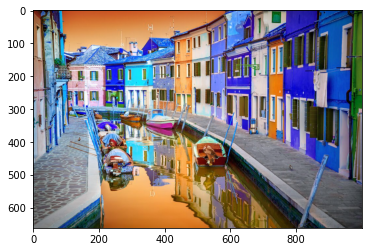

In [ ]:
image = cv2.imread('colorpic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

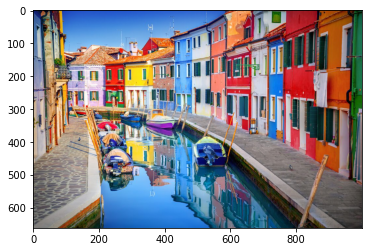

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

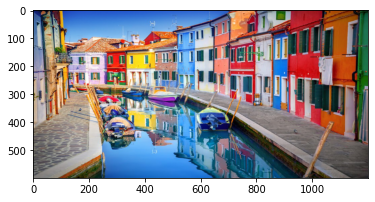

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):

  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

[array([107.00073334, 100.43961189, 101.5608676 ]),
 array([159.34306569, 147.96014447, 147.74702599]),
 array([226.18733463, 157.17551596,  85.25665902]),
 array([208.03980501, 203.52122209, 204.74399975]),
 array([179.10756957,  53.45980113,  30.18792878]),
 array([ 46.11206302, 115.07389663, 197.13086199]),
 array([31.41732373, 54.95698607, 57.44225045]),
 array([101.54511936, 167.60543607, 230.56095486])]

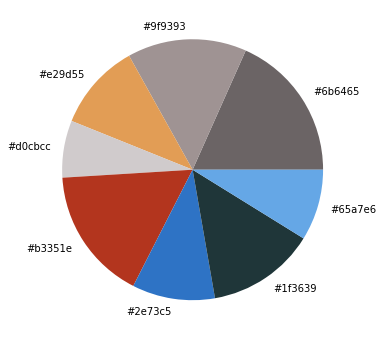

In [ ]:
get_colors(get_image('colorpic.jpg'), 8, True)